In [1]:
# Importing necessary libraries

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("cubehelix") # Other palettes: "Set2", "husl", "cubehelix", "hls"

In [2]:
# Reading the input file

import os
cwd = os.getcwd()

train_values = cwd + "\\Source Data\\train_values.csv"
train_values = pd.read_csv(train_values)
train_labels = cwd + "\\Source Data\\train_labels.csv"
train_labels = pd.read_csv(train_labels)

test_values = cwd + "\\Source Data\\test_values.csv"
test_values = pd.read_csv(test_values)
test_id = test_values.patient_id
test = test_values.drop('patient_id', axis=1)

train = train_values.join(train_labels.set_index('patient_id'), on='patient_id', how='left')

In [3]:
# Data Prep

y = train['heart_disease_present']
x = train.drop(['heart_disease_present', 'patient_id'], axis=1)

In [4]:
x.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [5]:
# Select the columns to include

cols_to_include = list(x.columns)

cols_to_include = ['int64', 'float64']
x = x.select_dtypes(include=cols_to_include)
test = test.select_dtypes(include=cols_to_include)


In [6]:
# Generating dummies

x_rows = x.shape[0]
df = x.append(test)

df = pd.get_dummies(df, drop_first=True)

x = df.iloc[:x_rows,]
test = df.iloc[x_rows:,]

In [7]:
# # STANDARDIZING FEATURES USING STANDARD SCALER
# from sklearn.preprocessing import StandardScaler

# stdScaler = StandardScaler()
# colNames = x.columns

# x = stdScaler.fit_transform(x)
# x = pd.DataFrame(data=x, columns=colNames)

# test = stdScaler.fit_transform(test)
# test = pd.DataFrame(data=test, columns=colNames)

In [8]:
# # NORMALIZING FEATURES USING NORMALIZER SCALER
# from sklearn.preprocessing import Normalizer

# scaler = Normalizer()
# colNames = x.columns

# x = scaler.fit_transform(x)
# x = pd.DataFrame(data=x, columns=colNames)

# test = scaler.fit_transform(test)
# test = pd.DataFrame(data=test, columns=colNames)

In [9]:
# Standardizing data using Power Transformer
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson', standardize=True)

colNames = x.columns
x = scaler.fit_transform(x)
x = pd.DataFrame(data=x, columns=colNames)

test = scaler.fit_transform(test)
test = pd.DataFrame(data=test, columns=colNames)

In [10]:
# # Standardizing data using Quantile Transformer
# from sklearn.preprocessing import QuantileTransformer

# scaler = QuantileTransformer(output_distribution='normal')

# colNames = x.columns
# x = scaler.fit_transform(x)
# x = pd.DataFrame(data=x, columns=colNames)

# test = scaler.fit_transform(test)
# test = pd.DataFrame(data=test, columns=colNames)

In [11]:
# # Standardizing data using MinMax Scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))

# colNames = x.columns
# x = scaler.fit_transform(x)
# x = pd.DataFrame(data=x, columns=colNames)

# test = scaler.fit_transform(test)
# test = pd.DataFrame(data=test, columns=colNames)

# Random Search Optimizer for SVC

In [12]:
# Creating a Random Grid

from sklearn.model_selection import RandomizedSearchCV

# Setting parameters for SVC
kernel = ['linear', 'poly', 'rbf']
C = [0.5, 1, 10, 20, 50]
gamma = [1, 5, 30, 50, 100]
decision_function_shape = ['ovo', 'ovr']


# Create the random grid
random_grid = {'kernel': kernel,
               'C': C,
               'decision_function_shape': decision_function_shape,
               'gamma':gamma}

random_grid

{'kernel': ['linear', 'poly', 'rbf'],
 'C': [0.5, 1, 10, 20, 50],
 'decision_function_shape': ['ovo', 'ovr'],
 'gamma': [1, 5, 30, 50, 100]}

In [13]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [14]:
# Performing the Random Search

# Use the random grid to search for best hyperparameters
# Let us use the base model "model" that is already created to tune the model against
from sklearn.svm import SVC
model = SVC(probability=True, random_state=1)

scoring = ['neg_log_loss', 'precision', 'recall']
# Multiple scoring cannot be used in RandomSearch unless refit is set to False. However, if refit is 
# set to false, then we cannot retrieve the best params and best estimators

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_random = RandomizedSearchCV(estimator = model, 
                                  param_distributions = random_grid, refit=True, n_jobs = -1,
                                  n_iter = 150, cv = 3, scoring='neg_log_loss', 
                                  verbose=200, random_state=42)
# Fit the random search model
model_random.fit(x, y)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling arra

Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    5.1s
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    5.2s

Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.2s
Pickling a

Pickling array (shape=(61,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    5.5s
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.5s
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=

Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    6.1s

Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed: 

Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(12,), dtype=object).[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    6.7s

Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    6.8s

Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(119,), dtype=

Pickling array (shape=(12,), dtype=object).[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    7.4s

Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:    8.7s
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=int32).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.9s
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(12, 180), dtype=float64).
Pickling array (shape=(12,), dtype=object).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(119,), dtype=int32).
Pickling array (shape=(61,), dtype=int32).
Pickling array (shape=(120,), dtype=int32).
Pickling array (shape=(60,), dtype=int32).
Pickling array (shape=(121,), dtype=int32).
Pickling array (shape=(59,), dtype=

C:\Users\sivac\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=150, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.5, 1, 10, 20, 50], 'decision_function_shape': ['ovo', 'ovr'], 'gamma': [1, 5, 30, 50, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_log_loss', verbose=200)

In [15]:
print(model_random.best_estimator_)
print(model_random.best_score_)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)
-0.4300651739763888


In [16]:
# Best estimator using SVC and Standard Scaler
# SVC(C=0.5, cache_size=500, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
#  max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

#Alternate Model 2

# SVC(C=1, cache_size=500, class_weight=None, coef0=0.0, decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
#  max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)


# Alternate Model 3

# SVC(C=0.5, cache_size=500, class_weight=None, coef0=0.0, decision_function_shape='ovo', degree=3, gamma=30, kernel='linear',
#  max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

# Alternate Model 4

# SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
#  max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [17]:
# Performing the Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x,y, 
                                                                stratify=y, 
                                                                random_state=1, 
                                                                test_size=0.25)

Confustion Matrix for Training Data - SVC
[[68  7]
 [10 50]]
Confustion Matrix for Test Data - SVC
[[18  7]
 [ 5 15]]
Classification Report for Training Data - SVC
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        75
           1       0.88      0.83      0.85        60

   micro avg       0.87      0.87      0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135

Classification Report for Test Data - SVC
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.68      0.75      0.71        20

   micro avg       0.73      0.73      0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.74      0.73      0.73        45

Log loss for Training data:  0.38034945198400005
Log loss for Validation data:  0.4962849897729605

AUROC Plot from SVC: 0.8360


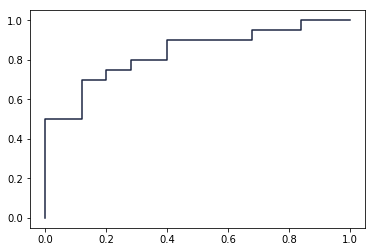

In [18]:
# Running the Random Forest Classifier using the best estimator

model = model_random.best_estimator_
# Choosing one of alternate models

#model = SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovo', degree=3, gamma=1, kernel='linear', 
#            max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)

model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

# Accuracy Metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data - SVC")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data - SVC")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data - SVC")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data - SVC")
print(classification_report(y_validation, predictions))

proba_train_predictions = model.predict_proba(x_train)[:,1]
proba_predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, proba_predictions, average='weighted')

# Print the log loss metric

print("Log loss for Training data: ", log_loss(y_train, proba_train_predictions))
print("Log loss for Validation data: ", log_loss(y_validation, proba_predictions))

fpr, tpr, threshold = roc_curve(y_validation, proba_predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("\nAUROC Plot from SVC:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show()

Power Transformer data performs little better than Std Scaler, Normalization

In [19]:
# Generating output using Logistic Regression without normalizing the data

proba_test_predictions = model.predict_proba(test)[:,1]

output = pd.DataFrame({'patient_id': test_id, 'heart_disease_present':proba_test_predictions})
output.to_csv(cwd + "\\Output Data\\Submission 17 - SVC-PowerTransformer-RandomSearch logloss 0.4992.csv", index=False)

In [21]:
# # Pushing the repo to git

# ! cd "C:\\Users\\sivac\\Documents\\Python Projects\\Driven Data\\Predicting Heart Disease"

# ! git add .
# ! git commit -am "Submission 17 - SVC-PowerTransformed Data with RandomSearch 0.3770"
# ! git push

The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.


[master e34b187] Submission 17 - SVC-PowerTransformed Data with RandomSearch 0.3770
 4 files changed, 5335 insertions(+), 176 deletions(-)
 create mode 100644 .ipynb_checkpoints/Submission 17 - SVC Submission Score 0-3770-checkpoint.ipynb
 create mode 100644 Output Data/Submission 17 - SVC-PowerTransformer-RandomSearch logloss 0.4962.csv
 create mode 100644 Submission 17 - SVC Submission Score 0-3770.ipynb


To https://github.com/sivacharansrc/Predicting-Heart-Disease.git
   b25eb21..e34b187  master -> master
